In [4]:
import cv2 
from matplotlib import pyplot as plt
from pathlib import Path
from skimage import io
from skimage import img_as_ubyte
import numpy as np
from pathlib import Path
from skimage import io
from skimage import color
from skimage import measure
from skimage import morphology
from skimage import transform
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import glob
import cv2
import json
import os
import cv2 
from matplotlib import pyplot as plt
from pathlib import Path
from skimage import filters,exposure,img_as_ubyte
import numpy as np
import sys


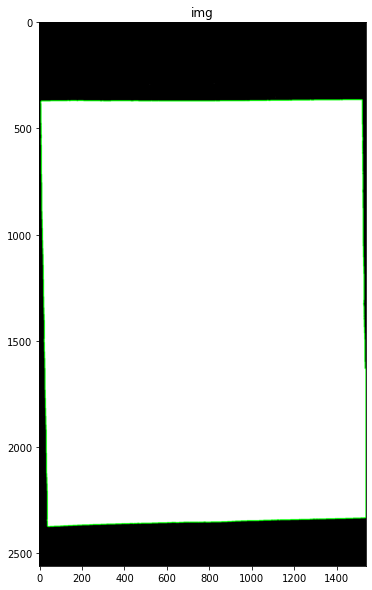

In [20]:


image_path = "../data/partial_results/img_10.png"
img = cv2.imread(image_path, cv2.THRESH_BINARY)



kernel = np.ones((7,7), dtype=np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img = color.gray2rgb(img)
c = max(contours, key = cv2.contourArea)
cv2.drawContours(img, [c], -1, (0,255,0), 3)

plt.gcf().set_size_inches(20, 10)
plt.imshow(img,cmap = 'gray'),plt.title('img')
plt.show() 


# print(c)

In [127]:
image_path = "../data/partial_results/canny_adam/img_14.png"
img = cv2.imread(image_path, cv2.THRESH_BINARY)

kernelc= np.array([np.array([20,2,0,2,20]),
                 np.array([8,1,0,1,8]),
                 np.array([10,0,0,0,10]),
                 np.array([8,1,0,1,8]),
                 np.array([20,2,0,2,20])])

img_conv = cv2.filter2D(img,80,kernelc)

kernel1 = np.ones((5,5),np.uint8)
img_erode1 = cv2.erode(img_conv,kernel1,iterations = 1)

img_conv2 = cv2.filter2D(img_erode1,80,kernelc)

kernel2 = np.ones((3,3),np.uint8)
img_erode2 = cv2.erode(img_conv2,kernel2,iterations = 3)

img_conv3 = cv2.filter2D(img_erode1,80,kernelc)

kernel2 = np.ones((3,3),np.uint8)
img_erode3 = cv2.erode(img_conv3,kernel2,iterations = 3)

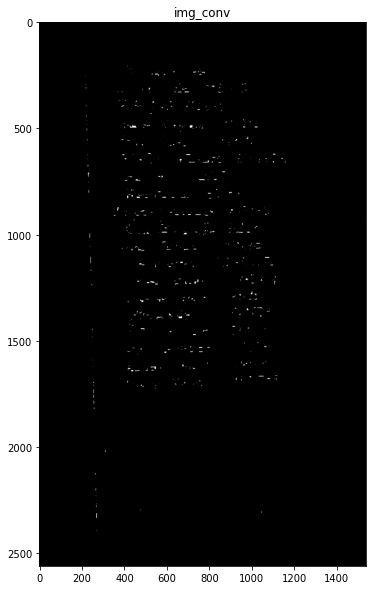

In [129]:

plt.gcf().set_size_inches(20, 10)
plt.imshow(img_erode3,cmap = 'gray'),plt.title('img_conv')
plt.show() 


In [ ]:
import cv2
import numpy as np

img = cv2.imread('../data/partial_results/canny_adam/img_14.png')
img = cv2.resize(img,(400,500))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,gray = cv2.threshold(gray,127,255,0)
gray2 = gray.copy()

contours, hier = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    if 200<cv2.contourArea(cnt)<5000:
        (x,y,w,h) = cv2.boundingRect(cnt)
        cv2.rectangle(gray2,(x,y),(x+w,y+h),0,-1)

cv2.imshow('IMG',gray2)
cv2.waitKey(0)
cv2.destroyAllWindows()

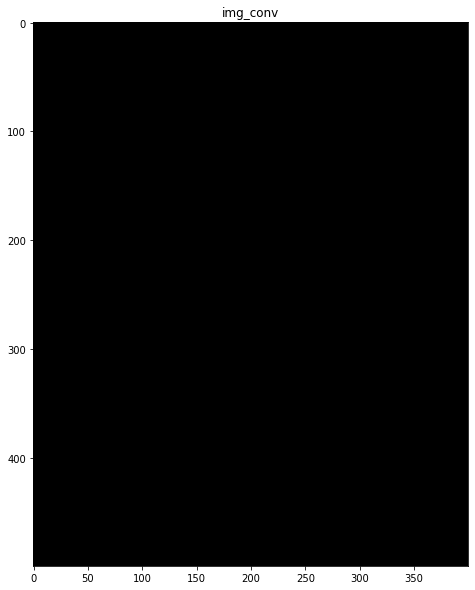